In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pydotplus
%matplotlib inline

In [2]:
def fmli_reader(): 
    #create an empty DataFrame and declare the location for the source files on github 
    fmli = pd.DataFrame() 
    url = 'https://raw.githubusercontent.com/clayknappen/CE-Trees-and-Linear-Regression/master/fmli' 

    cols = ['TOTEXPPQ', 'FINCBTAX', 'REF_RACE', 'SEX_REF', 'EDUC_REF', 'AGE_REF', 'FINLWT21'] 
    dtypes = {'TOTEXPPQ' : float, 'FINCBTAX' : float, 'REF_RACE' : str,  
               'SEX_REF' : str, 'EDUC_REF' : str, 'AGE_REF' : int} 

    for i in range(1,6): 
        if i == 1: 
            df = pd.read_csv(url + '151x.csv', usecols=cols, dtype=dtypes) 
        elif i == 5: 
            df = pd.read_csv(url + '161.csv', usecols=cols, dtype=dtypes) 
        else: 
            df = pd.read_csv(url + '15' + str(i) + '.csv', usecols=cols, dtype=dtypes) 
            fmli = fmli.append(df) 
        del df  
    return fmli 
 
fmli15 = fmli_reader() 

In [49]:
X = fmli15['FINCBTAX']
X = sm.add_constant(X, prepend=False) #add an intercept term for Statsmodels to use in fitting OLS

y = fmli15['TOTEXPPQ'] * 4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [50]:
ols = sm.OLS(y_train, X_train)

res = ols.fit()

print res.summary()

                            OLS Regression Results                            
Dep. Variable:               TOTEXPPQ   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3471.
Date:                Wed, 26 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:47:30   Log-Likelihood:            -1.5385e+05
No. Observations:               12978   AIC:                         3.077e+05
Df Residuals:                   12976   BIC:                         3.077e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
FINCBTAX       0.2455      0.004     58.913      0.0

0.221564356907


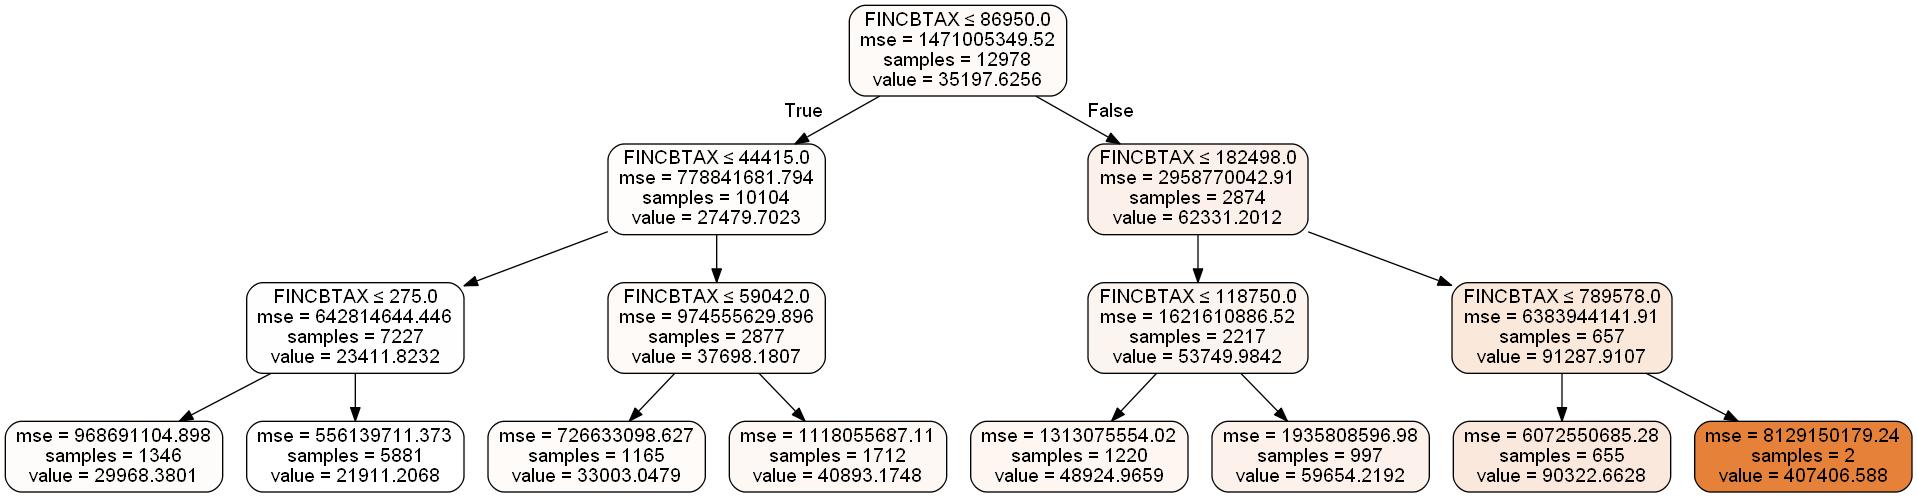

In [56]:
rt = DecisionTreeRegressor(max_depth=3) 

rt.fit(X_train, y_train)
print rt.score(X_train, y_train)

dot_data = tree.export_graphviz(rt, out_file=None, 
                                feature_names=['FINCBTAX'],
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

31780.7195345
31357.6002085


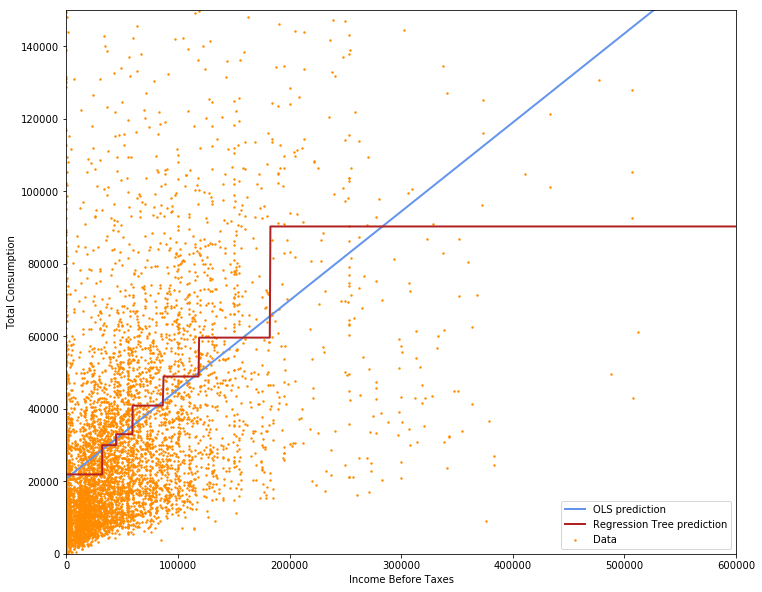

In [63]:
ols_pred = res.predict(X_test)

ols_rmse = np.sqrt(np.mean(np.square(y_test - ols_pred)))
print ols_rmse

X_ols = np.vstack([X_test['FINCBTAX'], ols_pred])
X_ols.sort()

rt_pred = rt.predict(X_test)

rt_rmse = np.sqrt(np.mean(np.square(y_test - rt_pred)))
print rt_rmse

X_rt = np.vstack([X_test['FINCBTAX'], rt_pred])
X_rt.sort()

plt.figure(figsize=[12,10])
plt.scatter(X_test['FINCBTAX'], y_test , color='darkorange', label='Data', s=2)
plt.plot(X_ols[0], X_ols[1], color='cornflowerblue', label='OLS prediction', linewidth=2)
plt.plot(X_rt[0], X_rt[1], color='firebrick', label='Regression Tree prediction', linewidth=2)
plt.ylabel('Total Consumption')
plt.xlabel('Income Before Taxes')
plt.ylim([0,150000])
plt.xlim([0,600000])
plt.legend()
plt.show()

# the slope toward the last split is an artifact of the test data values for FINCBTAX - the cliffs should all be vertical